In [1]:
import glob
import time
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from scipy import misc
from sklearn.utils import shuffle
from scipy.ndimage.measurements import label
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
%matplotlib inline

In [2]:
# %load functions.py
import collections
from functions3 import *
import pickle
from queue import LifoQueue
import PIL

In [3]:
### TODO: Tweak these parameters and see how the results change.
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 11  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = "ALL" # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

In [4]:
svc = joblib.load('svc.pkl')
X_scaler = joblib.load('scaler.pkl')

In [5]:
def pipeline(image):
    '''boxes_list = find_cars(image,ystart, ystop, scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)'''
    heat = np.zeros_like(image[:,:,0]).astype(np.float)
    # Add heat to each box in box list
    #heatmap_avg = heatmap_sum/10
    # Apply threshold to help remove false positives
    #heat = apply_threshold(heatmap_sum,1)
    bboxes1 =[]
    
    ystart = 400
    ystop = 656
    scale = 4
    box_list1 = find_cars(image, ystart, ystop , scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    ystart = 432
    ystop = 624
    scale = 3
    box_list2 = find_cars(image, ystart, ystop , scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    ystart = 400
    ystop = 592
    scale = 2
    box_list3 = find_cars(image, ystart, ystop , scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    ystart = 400
    ystop = 592
    scale = 1.5
    box_list4 = find_cars(image, ystart, ystop , scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

    ystart = 400
    ystop = 496
    scale = 1.0
    box_list5 = find_cars(image, ystart, ystop , scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

#     ystart = 400
#     ystop = 660
#     scale = 3.5
#     box_list6 = find_cars(image, ystart, ystop , scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

#     ystart = 464
#     ystop = 660
#     scale = 3.5
#     box_list7 = find_cars(image, ystart, ystop , scale, svc, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)


    bboxes1.extend(box_list1)
    bboxes1.extend(box_list2)    
    bboxes1.extend(box_list3)    
    bboxes1.extend(box_list4)     
    bboxes1.extend(box_list5)
#     bboxes1.extend(box_list6)
#     bboxes1.extend(box_list7)



    current_heatmap = add_heat(heat,bboxes1)
    heatmaps.append(current_heatmap)
    heatmap_sum = np.array(heatmaps).sum(axis=0)
    #heat = heatmap_sum/10
    #heat = add_heat(heat,bboxes1)
    heat = apply_threshold(heatmap_sum,5)

    # Visualize the heatmap when displaying    
    heatmap = np.clip(heatmap_sum, 0, 255)
    labels = label(heat)
    draw_img = draw_labeled_bboxes(np.copy(image), labels)


    '''f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    ax2.imshow(heatmap)
    ax1.imshow(draw_img)
    ret_img = draw_img'''
    #heatmap = (np.dstack((heatmap, heatmap, heatmap))*255).astype(np.uint8)
    #numpy_horizontal = np.hstack((draw_img, heatmap))
    
    
    return draw_img

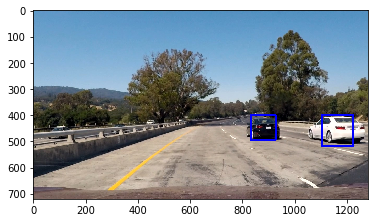

In [6]:
image = mpimg.imread('test_images/test1.jpg')
heatmaps = collections.deque(maxlen=5) 
img= pipeline(image)

# #plt.imshow(heatmap)
plt.imshow(img)

# #cv2.imwrite('output_images/test2.jpg',img)

In [14]:
#plt.imshow(heatmap)

In [ ]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
heatmaps = collections.deque(maxlen=10)
write_output = 'project_video_out.mp4'
clip1 = VideoFileClip("project_video.mp4").subclip(15,35)
write_clip = clip1.fl_image(pipeline)
%time write_clip.write_videofile(write_output, audio=False)

[MoviePy] >>>> Building video project_video_out.mp4
[MoviePy] Writing video project_video_out.mp4


 60%|███████████████████████████████████████████████▉                                | 300/501 [35:52<21:58,  6.56s/it]